In [2]:
import numpy as np
import pandas as pd

## 2022 NOAA Storm Data Exploration & Visualiztion

This notebook explores the 2022 Storm Events Database published by the National Centers for Environmental Information's National Oceanic and Atmospheric Administration (NOAA). Recorded is data regarding the location, fatalities, and details of storms and other significant weather phenomena. 

The data used comes from the [NOAA's Storm Events Database](https://www.ncdc.noaa.gov/stormevents/ftp.jsp). The full 2021 year CSV files for bulk download are located [here](https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/). (At the time of use, files were last modified 2022-10-18 16:07) More information about the data can be found on the [FAQ page](https://www.ncdc.noaa.gov/stormevents/faq.jsp) and information regarding the fields/columns can be found [here](https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf).

<div>
<img src="noaa_emblem_logo-2022.png" width="100"/>
</div>

## Table of Contents
1. [Data Loading](#loading)
2. [Data Cleaning](#cleaning)
3. [Data Exploration & Transformation](#explore)
[<ul>Details Data</ul>](#details)
[<ul>Fatalities Data</ul>](#fatalities)
[<ul>Locations Data</ul>](#locations)
4. [Data Visualization](#viz)

#### Note: 
- Some visualiztions do not display in GitHub, so I added screenshots in the repository
- Hyperlinks in the Jupyter Notebook will not work in GitHub

## Data Loading<a name="loading"></a>

In [8]:
# downloaded on 1/2/2023

details = pd.read_csv('/historic_storms/StormEvents_details-ftp_v1.0_d2022_c20221216.csv')
fatalities = pd.read_csv('/historic_storms/StormEvents_fatalities-ftp_v1.0_d2022_c20221216.csv')
locations = pd.read_csv('/historic_storms/StormEvents_locations-ftp_v1.0_d2022_c20221216.csv')

## Data Cleaning<a name="cleaning"></a>

Used a `for` loop to change the column names in each DataFrame to lowercase and snake case. In initial review, appears all column names were already snake case, but renamed just to be safe.

In [9]:
df_list = [locations, fatalities, details]

for df in df_list:
    df.rename(columns=lambda col: col.replace(' ', '_').lower(), inplace=True)

Utilized `.head()`, `.shape`, `.info()`, and `.describe()` to familiarize myself with the data. Additional information about specific fields and columns can be found [here](https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf).

In [10]:
details.head()
details.info()
details.describe()
details.shape #2021: 61110 rows, 2022: 56,636

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   begin_yearmonth     56636 non-null  int64  
 1   begin_day           56636 non-null  int64  
 2   begin_time          56636 non-null  int64  
 3   end_yearmonth       56636 non-null  int64  
 4   end_day             56636 non-null  int64  
 5   end_time            56636 non-null  int64  
 6   episode_id          56636 non-null  int64  
 7   event_id            56636 non-null  int64  
 8   state               56636 non-null  object 
 9   state_fips          56636 non-null  int64  
 10  year                56636 non-null  int64  
 11  month_name          56636 non-null  object 
 12  event_type          56636 non-null  object 
 13  cz_type             56636 non-null  object 
 14  cz_fips             56636 non-null  int64  
 15  cz_name             56636 non-null  object 
 16  wfo 

(56636, 51)

In [11]:
fatalities.head()
fatalities.info()
fatalities.describe()
fatalities.shape #2021: 978 rows, 2022: 558

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fat_yearmonth      558 non-null    int64  
 1   fat_day            558 non-null    int64  
 2   fat_time           558 non-null    int64  
 3   fatality_id        558 non-null    int64  
 4   event_id           558 non-null    int64  
 5   fatality_type      558 non-null    object 
 6   fatality_date      558 non-null    object 
 7   fatality_age       393 non-null    float64
 8   fatality_sex       490 non-null    object 
 9   fatality_location  558 non-null    object 
 10  event_yearmonth    558 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 48.1+ KB


(558, 11)

In [12]:
locations.head()
locations.info()
locations.describe()
locations.shape #58271 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43231 entries, 0 to 43230
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearmonth       43231 non-null  int64  
 1   episode_id      43231 non-null  int64  
 2   event_id        43231 non-null  int64  
 3   location_index  43231 non-null  int64  
 4   range           43231 non-null  float64
 5   azimuth         43231 non-null  object 
 6   location        43231 non-null  object 
 7   latitude        43231 non-null  float64
 8   longitude       43231 non-null  float64
 9   lat2            43231 non-null  int64  
 10  lon2            43231 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 3.6+ MB


(43231, 11)

The `details` DataFrame has a total of 51 columns. I am removing unnecessary columns that I know will not be utilized.

In [13]:
drop_features = ['cz_type', 'cz_fips', 'wfo', 'source', 'category', 'begin_azimuth', 'end_azimuth', 'data_source', 'injuries_indirect', 'injuries_direct', 'deaths_direct', 'deaths_indirect']

details = details.drop(drop_features, axis=1)

Checking for duplicates in the `event_id` column of each DataFrame. Per the NOAA documentation, this is the unique identifier and how each DataFrame is linked.

In [14]:
locations['event_id'].isna().sum()

0

In [15]:
fatalities['event_id'].isna().sum()

0

In [16]:
details['event_id'].isna().sum()

0

The dates are split with the year and month in one column and day in another column (`locations` does not include the day field). Creating a new column that combines the information into a more useful format.

In [17]:
details['begin_date'] = details['begin_yearmonth'].astype(str).str[:4] + '-' + details['begin_yearmonth'].astype(str).str[4:] + '-' + details['begin_day'].astype(str)
details['end_date'] = details['end_yearmonth'].astype(str).str[:4] + '-' + details['end_yearmonth'].astype(str).str[4:] + '-' + details['end_day'].astype(str)

fatalities['fatality_date'] = fatalities['fat_yearmonth'].astype(str).str[:4] + '-' + fatalities['fat_yearmonth'].astype(str).str[4:] + '-' + fatalities['fat_day'].astype(str)

#locations does not have a day column
locations['location_date'] = locations['yearmonth'].astype(str).str[:4] + '-' + locations['yearmonth'].astype(str).str[4:]

The `damage_property` and `damage_crops` columns contain information about the monetary damage caused by a storm event. The current formatting (ex. $10.00K to represent 10000), is not useful for aggregate functions. 

Converting the columns from an object data type to integer and creating a new column called `damage_total` which is the total of `damage_property` and `damage_crops` for each storm event.

In [18]:
import warnings
warnings.filterwarnings('ignore')

details['damage_property'] = details['damage_property'].fillna('N/A')
details['damage_crops'] = details['damage_crops'].fillna('N/A')

details.loc[details['damage_property'].str.contains('K'), 'damage_property'] = details['damage_property'].str.replace('K', '').str.replace('.', '') + '0'
details.loc[details['damage_property'].str.contains('M'), 'damage_property'] = details['damage_property'].str.replace('M', '').str.replace('.', '') + '0000'
details.loc[details['damage_property'].str.contains('B'), 'damage_property'] = details['damage_property'].str.replace('B', '').str.replace('.', '') + '0000000'

details.loc[details['damage_crops'].str.contains('K'), 'damage_crops'] = details['damage_crops'].str.replace('K', '').str.replace('.', '') + '0'
details.loc[details['damage_crops'].str.contains('M'), 'damage_crops'] = details['damage_crops'].str.replace('M', '').str.replace('.', '') + '0000'
details.loc[details['damage_crops'].str.contains('B'), 'damage_crops'] = details['damage_crops'].str.replace('B', '').str.replace('.', '') + '0000000'

details = details.replace('N/A', None)

details['damage_total'] = details['damage_property'].astype('Int64') + details['damage_crops'].astype('Int64')

## Data Exploration & Transformation<a name="explore"></a>

#### `Details` DataFrame<a name="details"></a>

I am curious about which states had the most storm events.

Looks like a significant amount of events occurred in Texas, so I calculated the corresponding percentage and was surprised to see it was only 7.57%.

In [19]:
details['state'].value_counts().head()

TEXAS           4765
MINNESOTA       2371
SOUTH DAKOTA    2250
KANSAS          1911
VIRGINIA        1844
Name: state, dtype: int64

In [20]:
details.to_csv("tester.csv")

In [21]:
round((details.loc[details.state == details['state'].value_counts().idxmax(), 'state'].count() / details['state'].count()) * 100, 2)

8.41

What type of storm events occurred most? [Corresponding Visualation](#eventcount) <a name="eventcountback"></a>

In [22]:
details['event_type'].value_counts()[:10]

Thunderstorm Wind           16963
Hail                         6839
Drought                      4949
High Wind                    3639
Winter Weather               3290
Flash Flood                  2859
Winter Storm                 2547
Marine Thunderstorm Wind     2360
Heat                         1800
Flood                        1604
Name: event_type, dtype: int64

The count of `event_type` grouped by `state` where the count is greater than 300 (to minimize results). [Corresponding Visualation](#allevents) <a name="alleventsback"></a>

In [23]:
details.groupby('state')['event_type'].value_counts()[details.groupby('state')['event_type'].value_counts()>300]

state           event_type              
ALABAMA         Thunderstorm Wind            416
ARIZONA         Flash Flood                  410
ARKANSAS        Thunderstorm Wind            314
ATLANTIC NORTH  Marine Thunderstorm Wind     851
ATLANTIC SOUTH  Marine Thunderstorm Wind     425
CALIFORNIA      Drought                      465
                High Wind                    304
FLORIDA         Thunderstorm Wind            405
GEORGIA         Thunderstorm Wind            702
GULF OF MEXICO  Marine Thunderstorm Wind     801
ILLINOIS        Thunderstorm Wind            675
INDIANA         Thunderstorm Wind            480
IOWA            Thunderstorm Wind            316
KANSAS          Thunderstorm Wind            507
                Hail                         458
KENTUCKY        Thunderstorm Wind            677
MARYLAND        Thunderstorm Wind            390
MINNESOTA       Thunderstorm Wind            803
                Hail                         699
MISSISSIPPI     Thunderstorm

I have decided that I am most interested in tornadoes. Created a new DataFrame called `tornado_details` which includes all rows from the `details` DataFrame where the `event_type` column is equal to "Tornado."

The same will not need to be completed for the `fatalities` and `locations` DataFrames.

In [24]:
tornado_details = details[details['event_type'] == 'Tornado'].reset_index(drop= True)

tornado_details.head()
tornado_details.info()
tornado_details.describe()
tornado_details.shape #1543 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   begin_yearmonth     1159 non-null   int64  
 1   begin_day           1159 non-null   int64  
 2   begin_time          1159 non-null   int64  
 3   end_yearmonth       1159 non-null   int64  
 4   end_day             1159 non-null   int64  
 5   end_time            1159 non-null   int64  
 6   episode_id          1159 non-null   int64  
 7   event_id            1159 non-null   int64  
 8   state               1159 non-null   object 
 9   state_fips          1159 non-null   int64  
 10  year                1159 non-null   int64  
 11  month_name          1159 non-null   object 
 12  event_type          1159 non-null   object 
 13  cz_name             1159 non-null   object 
 14  begin_date_time     1159 non-null   object 
 15  cz_timezone         1159 non-null   object 
 16  end_da

(1159, 42)

Which states had the most tornadoes? 

In [25]:
tornado_details['state'].value_counts().head(10)

MISSISSIPPI    127
TEXAS          106
ALABAMA         92
MINNESOTA       83
KANSAS          63
FLORIDA         59
IOWA            56
GEORGIA         52
OKLAHOMA        45
LOUISIANA       39
Name: state, dtype: int64

Which states had the most "EF5" scale tornadoes?

Interesting... Looks like there were no tornadoes in 2021 with the "EF5" rating. After some research, I learned that the last tornado with this rating occurred on May 20, 2013 in Moore, Oklahoma. 

In [26]:
tornado_details['state'][tornado_details['tor_f_scale'] == 'EF5'] #no results

Series([], Name: state, dtype: object)

In [27]:
tornado_details['tor_f_scale'].value_counts().sort_index()

EF0    415
EF1    467
EF2    110
EF3     16
EF4      2
EFU    149
Name: tor_f_scale, dtype: int64

I noticed there is a value in the `tor_f_scale` column called "EFU." Per NOAA's documentation, values in this column should be either EF0, EF1, EF2, EF3, EF4, or EF5.

"EFU" is used to represent EF-Unknown where the tornado "cannot be rated due to a lack of damage evidence." 
 
To avoid confusion, I am going to replace "EFU" with "Unknown." 

In [28]:
tornado_details['tor_f_scale'] = tornado_details['tor_f_scale'].replace('EFU', 'Unknown')

tornado_details['tor_f_scale'].value_counts().sort_index()

EF0        415
EF1        467
EF2        110
EF3         16
EF4          2
Unknown    149
Name: tor_f_scale, dtype: int64

What is the `damage_total` for each tornado rating, excluding "Unknown"? [Corresponding Visualation](#efdam) <a name="efdamback"></a>

In [29]:
tornado_details[tornado_details['tor_f_scale'].str.contains('Unknown') == False].groupby('tor_f_scale')['damage_total'].sum().sort_values(ascending = False)

tor_f_scale
EF2    210180000
EF3    139575000
EF4     75000000
EF1     34272000
EF0     12939350
Name: damage_total, dtype: Int64

Since the highest rating given in 2021 was "EF4," I am going to explore tornadoes with this rating further. 

Interestingly, 8/9 of tornadoes assigned an "EF4" rating occurred on the same day. 
6/9 are in the same episode (an episode contains 1 or more events). 

In [30]:
tornado_details[['end_date', 'episode_id', 'event_id']][tornado_details['tor_f_scale'] == 'EF4'].value_counts()

end_date   episode_id  event_id
2022-03-5  166486      1007076     1
2022-04-5  166881      1014520     1
dtype: int64

Going back to the `details` DataFrame (contains all storm events, not just tornadoes), what other `event_types` did this episode produce?

This weather episode that produced the most EF4 tornadoes contained a total of 12 tornadoes events, 2 hail events, and 1 thunderstorm wind event. 

In [31]:
most_ef4_episode = tornado_details[tornado_details['tor_f_scale'] == 'EF4']['episode_id'].value_counts().idxmax()

details[details['episode_id'] == most_ef4_episode]['event_type'].value_counts()

Thunderstorm Wind    8
Hail                 3
Tornado              1
Name: event_type, dtype: int64

Which `episode_id` had the most events?

For the episode with the most amount of events, what were the `event_types`? 

In [32]:
details['episode_id'].value_counts().idxmax()

171798

In [33]:
details[details['episode_id'] == details['episode_id'].value_counts().idxmax()]['event_type'].value_counts()

Thunderstorm Wind    152
Hail                  21
Name: event_type, dtype: int64

For the single episode that contains the most start events, how much damage was caused?

There was a total of $7,127,500.00 in damage to property and crops combined.

In [34]:
details[details['episode_id'] == details['episode_id'].value_counts().idxmax()]['damage_total'].sum()

0

#### `Fatalities` DataFrame<a name="fatalities"></a>

At which `fatality_location`(s) did the most fatalities occur?

The most common `fatality_location` field is "Unknown." Where did the most fatalities occur that had a known location?

In [35]:
fatalities['fatality_location'].value_counts().head()

Vehicle/Towed Trailer    168
Outside/Open Areas       133
In Water                  95
Permanent Home            58
Unknown                   43
Name: fatality_location, dtype: int64

In [36]:
fatalities[fatalities['fatality_location'].str.contains('Unknown') == False]['fatality_location'].value_counts()

Vehicle/Towed Trailer           168
Outside/Open Areas              133
In Water                         95
Permanent Home                   58
Mobile/Trailer Home              16
Boating                          15
Camping                          10
Permanent Structure              10
Under Tree                        5
Other                             3
Business                          1
Heavy Equipment/Construction      1
Name: fatality_location, dtype: int64

What percentage of fatalities were indirectly and directly related to a storm event?

In [37]:
round(fatalities['fatality_type'].value_counts(normalize = True), 3)

D    0.767
I    0.233
Name: fatality_type, dtype: float64

What is the percentage of each gender who had a fatality due to a storm event?

In [38]:
round(fatalities['fatality_sex'].fillna('N/A').value_counts(normalize = True), 3)

M      0.568
F      0.310
N/A    0.122
Name: fatality_sex, dtype: float64

Binned each individual based on `fatality_age` into the following categories:
- 0-18
- 18-24
- 25-34
- 35-44
- 45-54
- 55-64
- 65+

In [39]:
fatalities['age_category'] = fatalities['fatality_age']

fatalities.loc[:, 'age_category'] = pd.cut(x = fatalities['age_category'], bins = [0, 18, 24, 34, 44, 54, 64, 100], labels = ['0-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

fatalities['age_category'] = fatalities['age_category'].cat.reorder_categories(['0-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

fatalities

,fat_yearmonth,fat_day,fat_time,fatality_id,event_id,fatality_type,fatality_date,fatality_age,fatality_sex,fatality_location,event_yearmonth,age_category
0,202202,2,0,45421,995493,I,2022-02-2,NaN,NaN,Vehicle/Towed Trailer,202202,NaN
1,202202,2,0,45422,995493,I,2022-02-2,NaN,NaN,Vehicle/Towed Trailer,202202,NaN
2,202202,2,0,45423,995500,I,2022-02-2,18.0,M,Outside/Open Areas,202202,0-18
3,202202,2,0,45424,995524,I,2022-02-2,35.0,M,Vehicle/Towed Trailer,202202,35-44
4,202202,17,0,46159,1000649,D,2022-02-17,29.0,F,Boating,202202,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...
553,202204,7,0,46375,1020057,I,2022-04-7,54.0,M,Vehicle/Towed Trailer,202204,45-54
554,202204,10,0,46348,1021301,D,2022-04-10,44.0,M,Outside/Open Areas,202204,35-44
555,202208,30,0,47058,1055029,D,2022-08-30,50.0,M,Outside/Open Areas,202208,45-54
556,202204,13,0,46362,1023199,I,2022-04-13,30.0,F,Outside/Open Areas,202204,25-34


What is the count and percentage of the number of fatalities in each `age_category` bin?

In [40]:
fatalities['age_category'].value_counts().sort_index()

0-18      35
18-24     31
25-34     52
35-44     41
45-54     47
55-64     66
65+      117
Name: age_category, dtype: int64

In [41]:
round(fatalities['age_category'].value_counts(normalize = True), 3).sort_index()

0-18     0.090
18-24    0.080
25-34    0.134
35-44    0.105
45-54    0.121
55-64    0.170
65+      0.301
Name: age_category, dtype: float64

The `fatalities` DataFrame did not have information about the `event_type` that caused the fatality so I merged it with the `details` DataFrame to add the associated `event_type`.

In [42]:
fatalities = pd.merge(fatalities,details[['event_type', 'event_id']], on = 'event_id')#, how='left')

fatalities

,fat_yearmonth,fat_day,fat_time,fatality_id,event_id,fatality_type,fatality_date,fatality_age,fatality_sex,fatality_location,event_yearmonth,age_category,event_type
0,202202,2,0,45421,995493,I,2022-02-2,NaN,NaN,Vehicle/Towed Trailer,202202,NaN,Heavy Snow
1,202202,2,0,45422,995493,I,2022-02-2,NaN,NaN,Vehicle/Towed Trailer,202202,NaN,Heavy Snow
2,202202,2,0,45423,995500,I,2022-02-2,18.0,M,Outside/Open Areas,202202,0-18,Heavy Snow
3,202202,2,0,45424,995524,I,2022-02-2,35.0,M,Vehicle/Towed Trailer,202202,35-44,Winter Storm
4,202202,17,0,46159,1000649,D,2022-02-17,29.0,F,Boating,202202,25-34,Marine Strong Wind
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,202204,7,0,46375,1020057,I,2022-04-7,54.0,M,Vehicle/Towed Trailer,202204,45-54,Wildfire
553,202204,10,0,46348,1021301,D,2022-04-10,44.0,M,Outside/Open Areas,202204,35-44,Heavy Rain
554,202208,30,0,47058,1055029,D,2022-08-30,50.0,M,Outside/Open Areas,202208,45-54,Heat
555,202204,13,0,46362,1023199,I,2022-04-13,30.0,F,Outside/Open Areas,202204,25-34,Winter Weather


What were the top 10 `event_type`, based on count of fatalities (direct and indirect)? [Corresponding Visualation](#eventfat) <a name="eventfatback"></a>

In [43]:
fatalities.groupby('event_type')['event_id'].count().sort_values(ascending = False).head(10)

event_type
Heat                     111
Excessive Heat            64
Flash Flood               60
Rip Current               48
Thunderstorm Wind         36
Winter Weather            24
Lightning                 20
Flood                     20
Marine Tropical Storm     20
Dense Fog                 19
Name: event_id, dtype: int64

Looks like there is a large amount of different `event_type` variables and some appear very similar with minimal differences. Created a new column called `event_category` that assigns a more generalized category based on substrings of `event_type`.

In [44]:
fatalities.loc[fatalities['event_type'].str.contains('Cold|Frost', case=False), 'event_category'] = 'Cold'
fatalities.loc[fatalities['event_type'].str.contains('Dust', case=False), 'event_category'] = 'Dust'
fatalities.loc[fatalities['event_type'].str.contains('Fire', case=False), 'event_category'] = 'Fire'
fatalities.loc[fatalities['event_type'].str.contains('Flood', case=False), 'event_category'] = 'Flood'
fatalities.loc[fatalities['event_type'].str.contains('Fog', case=False), 'event_category'] = 'Fog'
fatalities.loc[fatalities['event_type'].str.contains('Heat', case=False), 'event_category'] = 'Heat'
fatalities.loc[fatalities['event_type'].str.contains('Hurricane', case=False), 'event_category'] = 'Hurricane'
fatalities.loc[fatalities['event_type'].str.contains('Lightning', case=False), 'event_category'] = 'Lightning'
fatalities.loc[fatalities['event_type'].str.contains('Current|Surf|Marine|Tide|Sneaker', case=False), 'event_category'] = 'Marine'
fatalities.loc[fatalities['event_type'].str.contains('Debris|Hail', case=False), 'event_category'] = 'Misc'
fatalities.loc[fatalities['event_type'].str.contains('Rain', case=False), 'event_category'] = 'Rain'
fatalities.loc[fatalities['event_type'].str.contains('Avalanche|Snow|Blizzard', case=False), 'event_category'] = 'Snow'
fatalities.loc[fatalities['event_type'].str.contains('Tornado', case=False), 'event_category'] = 'Tornado'
fatalities.loc[fatalities['event_type'].str.contains('Wind', case=False), 'event_category'] = 'Wind'
fatalities.loc[fatalities['event_type'].str.contains('Winter|Ice', case=False), 'event_category'] = 'Winter'

fatalities

,fat_yearmonth,fat_day,fat_time,fatality_id,event_id,fatality_type,fatality_date,fatality_age,fatality_sex,fatality_location,event_yearmonth,age_category,event_type,event_category
0,202202,2,0,45421,995493,I,2022-02-2,NaN,NaN,Vehicle/Towed Trailer,202202,NaN,Heavy Snow,Snow
1,202202,2,0,45422,995493,I,2022-02-2,NaN,NaN,Vehicle/Towed Trailer,202202,NaN,Heavy Snow,Snow
2,202202,2,0,45423,995500,I,2022-02-2,18.0,M,Outside/Open Areas,202202,0-18,Heavy Snow,Snow
3,202202,2,0,45424,995524,I,2022-02-2,35.0,M,Vehicle/Towed Trailer,202202,35-44,Winter Storm,Winter
4,202202,17,0,46159,1000649,D,2022-02-17,29.0,F,Boating,202202,25-34,Marine Strong Wind,Wind
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,202204,7,0,46375,1020057,I,2022-04-7,54.0,M,Vehicle/Towed Trailer,202204,45-54,Wildfire,Fire
553,202204,10,0,46348,1021301,D,2022-04-10,44.0,M,Outside/Open Areas,202204,35-44,Heavy Rain,Rain
554,202208,30,0,47058,1055029,D,2022-08-30,50.0,M,Outside/Open Areas,202208,45-54,Heat,Heat
555,202204,13,0,46362,1023199,I,2022-04-13,30.0,F,Outside/Open Areas,202204,25-34,Winter Weather,Winter


Count of fatalities by `event_category` grouped by `age_category` where count is greater than 10. [Corresponding Visualation](#agefat) <a name="agefatback"></a>

In [45]:
fatalities.groupby('age_category')['event_category'].apply(print)

2           Snow
18        Winter
27        Marine
48         Flood
49        Marine
50        Marine
63        Marine
93        Marine
115         Wind
134        Flood
136         Heat
138         Heat
160         Wind
181        Flood
182         Wind
205        Flood
206        Flood
207        Flood
208        Flood
254         Heat
261       Marine
263       Marine
270       Marine
275       Marine
326         Heat
365       Marine
419        Flood
442    Lightning
443    Lightning
516         Wind
525      Tornado
526      Tornado
536       Marine
541         Wind
542         Wind
Name: 0-18, dtype: object
15           Fog
17        Marine
31        Winter
81        Marine
87          Wind
89           Fog
104      Tornado
131         Wind
139       Marine
140       Marine
146    Lightning
157         Wind
228          Fog
248         Heat
273       Marine
290         Heat
291         Heat
292         Heat
293         Heat
313         Heat
331       Marine
357        Flood
428  

age_category
0-18     None
18-24    None
25-34    None
35-44    None
45-54    None
55-64    None
65+      None
Name: event_category, dtype: object

In [46]:
fatalities.groupby('age_category')['event_category'].value_counts()[fatalities.groupby('age_category')['event_category'].value_counts()>10]

age_category  event_category
0-18          Marine            11
18-24         Heat              11
35-44         Heat              11
45-54         Heat              16
55-64         Heat              18
              Flood             14
              Marine            11
65+           Flood             31
              Heat              31
              Marine            11
Name: event_category, dtype: int64

#### `Locations` DataFrame<a name="locations"></a>

The `locations` DataFrame includes the `event_id`, but no information about the `event_type` so I merged it with the `details` DataFrame.

In [47]:
locations = pd.merge(locations,details[['event_type', 'state', 'event_id']], on = 'event_id')#, how='left')

locations.to_csv("noaa_storm_2022.csv")

Is there a `location` that frequently has storm events?

In [48]:
locations['location'].value_counts

<bound method IndexOpsMixin.value_counts of 0              TAMINA
1           LINE KILN
2               ELDEN
3          ROCK CREEK
4        NEELER GLADE
             ...     
43226     SOUTH RIVER
43227     SOUTH RIVER
43228     SOUTH RIVER
43229     SOUTH RIVER
43230     SOUTH RIVER
Name: location, Length: 43231, dtype: object>

What storm events did "San Juan" experience?

Looks like these events involved water, where is "San Juan" located?

In [49]:
locations['event_type'][locations['location'] == locations['location'].value_counts().idxmax()].value_counts()

Flood                97
Flash Flood          41
Thunderstorm Wind     4
Funnel Cloud          1
Lightning             1
Name: event_type, dtype: int64

In [50]:
locations['state'][locations['location'] == locations['location'].value_counts().idxmax()].head(1)

349    PUERTO RICO
Name: state, dtype: object

Going to be adding additional details about the location based on coordinates. To reduce the number of rows I am working with, I created a new DataFrame called `ia_locations` which consists of all rows from the `locations` DataFrame where the `state` is "IOWA" and `event_type` is "Tornado."

Iowa was selected because it experienced the most tornado events.

In [51]:
ia_locations = locations[(locations['state'] == 'IOWA') & (locations['event_type'] == 'Tornado')].reset_index()

ia_locations.head()

,index,yearmonth,episode_id,event_id,location_index,range,azimuth,location,latitude,longitude,lat2,lon2,location_date,event_type,state
0,7406,202204,168098,1017504,1,1.09,SSW,EUCLID,41.5351,-95.8569,4132106,9551414,2022-04,Tornado,IOWA
1,7407,202204,168098,1017504,2,1.11,NNW,HARD SCRATCH,41.6343,-95.7299,4138058,9543794,2022-04,Tornado,IOWA
2,7408,202204,168098,1017505,1,1.47,SSW,WOODBINE MUNI ARPT,41.7100,-95.6900,4142600,9541400,2022-04,Tornado,IOWA
3,7409,202204,168098,1017505,2,1.55,E,WOODBINE MUNI ARPT,41.7300,-95.6500,4143800,9539000,2022-04,Tornado,IOWA
4,8974,202204,168215,1018706,1,3.26,SSW,SARATOGA,43.3276,-92.4483,4319656,9226898,2022-04,Tornado,IOWA


Created a new column called `coordinate` that uses the `latitude` and `longitude` columns into a more useful format. Then using `geopy` reverse geocoding, added a dictionary of information about the coordinate into the `raw_address` column.

In [52]:
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent="myGeocoder")

ia_locations['coordinate'] = ia_locations.apply(lambda row: (str(row.latitude),str(row.longitude)),axis=1)

ia_locations['raw_address'] = ia_locations.apply(lambda row: locator.reverse(row.coordinate).raw, axis=1)

ia_locations.head()

,index,yearmonth,episode_id,event_id,location_index,range,azimuth,location,latitude,longitude,lat2,lon2,location_date,event_type,state,coordinate,raw_address
0,7406,202204,168098,1017504,1,1.09,SSW,EUCLID,41.5351,-95.8569,4132106,9551414,2022-04,Tornado,IOWA,"(41.5351, -95.8569)","{'place_id': 310736642, 'licence': 'Data © Ope..."
1,7407,202204,168098,1017504,2,1.11,NNW,HARD SCRATCH,41.6343,-95.7299,4138058,9543794,2022-04,Tornado,IOWA,"(41.6343, -95.7299)","{'place_id': 106282555, 'licence': 'Data © Ope..."
2,7408,202204,168098,1017505,1,1.47,SSW,WOODBINE MUNI ARPT,41.7100,-95.6900,4142600,9541400,2022-04,Tornado,IOWA,"(41.71, -95.69)","{'place_id': 299621108, 'licence': 'Data © Ope..."
3,7409,202204,168098,1017505,2,1.55,E,WOODBINE MUNI ARPT,41.7300,-95.6500,4143800,9539000,2022-04,Tornado,IOWA,"(41.73, -95.65)","{'place_id': 358823804, 'licence': 'Data © Ope..."
4,8974,202204,168215,1018706,1,3.26,SSW,SARATOGA,43.3276,-92.4483,4319656,9226898,2022-04,Tornado,IOWA,"(43.3276, -92.4483)","{'place_id': 106606922, 'licence': 'Data © Ope..."


Since the information in the `raw_address` column is in dictionary format, I want each key to be in its own column. Many of the columns contained primarily nulls. Removed columns with more than 90% null values.

In [53]:
raw_list = pd.DataFrame(ia_locations['raw_address'].values.tolist())

raw_address = pd.DataFrame(raw_list['address'].values.tolist())

raw_address = raw_address[raw_address.columns[raw_address.isnull().mean() < 0.9]]

ia_locations = pd.concat((ia_locations, raw_address),axis=1)

ia_locations.head()

,index,yearmonth,episode_id,event_id,location_index,range,azimuth,location,latitude,longitude,...,coordinate,raw_address,house_number,road,county,state,ISO3166-2-lvl4,postcode,country,country_code
0,7406,202204,168098,1017504,1,1.09,SSW,EUCLID,41.5351,-95.8569,...,"(41.5351, -95.8569)","{'place_id': 310736642, 'licence': 'Data © Ope...",2391,Lyons Trail,Harrison County,Iowa,US-IA,51555,United States,us
1,7407,202204,168098,1017504,2,1.11,NNW,HARD SCRATCH,41.6343,-95.7299,...,"(41.6343, -95.7299)","{'place_id': 106282555, 'licence': 'Data © Ope...",NaN,Reading Trail,Harrison County,Iowa,US-IA,NaN,United States,us
2,7408,202204,168098,1017505,1,1.47,SSW,WOODBINE MUNI ARPT,41.7100,-95.6900,...,"(41.71, -95.69)","{'place_id': 299621108, 'licence': 'Data © Ope...",NaN,NaN,Harrison County,Iowa,US-IA,NaN,United States,us
3,7409,202204,168098,1017505,2,1.55,E,WOODBINE MUNI ARPT,41.7300,-95.6500,...,"(41.73, -95.65)","{'place_id': 358823804, 'licence': 'Data © Ope...",NaN,County Road F32,Harrison County,Iowa,US-IA,51579,United States,us
4,8974,202204,168215,1018706,1,3.26,SSW,SARATOGA,43.3276,-92.4483,...,"(43.3276, -92.4483)","{'place_id': 106606922, 'licence': 'Data © Ope...",NaN,Falcon Road,Howard County,Iowa,US-IA,50628,United States,us


What `county` in Iowa experienced the most tornadoes?

In [54]:
ia_locations['county'].value_counts().idxmax()

'Mitchell County'

"Webster County" experienced a significant amount of tornadoes. Were specific streets more impacted than others?

In [55]:
ia_locations['road'][ia_locations['county'] == ia_locations['county'].value_counts().idxmax()].value_counts().head()

Mitchell Line Street    2
390th Street            1
400 Street              1
340th Street            1
330th Street            1
Name: road, dtype: int64

What `postcode` in Iowa experienced the most tornadoes?

For that postcode, what `county`(s) are within it?

In [56]:
ia_locations['postcode'].value_counts().head(10)

50466    4
50461    3
50471    3
52165    2
52310    2
52172    2
51555    1
51579    1
50628    1
52155    1
Name: postcode, dtype: int64

In [57]:
ia_locations['county'][ia_locations['postcode'] == ia_locations['postcode'].value_counts().idxmax()].value_counts()

Howard County      3
Mitchell County    1
Name: county, dtype: int64

## Data Visualization<a name="viz"></a>

Top 10 Storm Events by Occurance using `pyplot`. <a name="eventcount"></a> [Back](#eventcountback)

Text(0, 0.5, 'Number of Occurances')

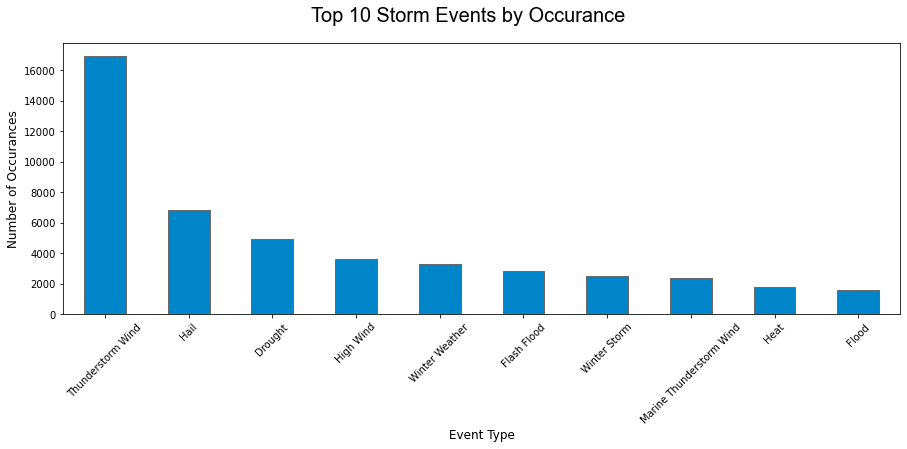

In [58]:
from matplotlib import pyplot as plt

top_10_event = details['event_type'].value_counts()[:10]
top_10_event.plot.bar(figsize = (15,5), color = '#0085CA', edgecolor = 'dimgrey')
plt.suptitle('Top 10 Storm Events by Occurance', fontsize = 20, fontname = 'Arial')

plt.xticks(rotation = 45)
plt.xlabel("Event Type", fontsize = 12)
plt.ylabel("Number of Occurances", fontsize = 12)

Top 15 Storm Events on map using `pyplot.express`.  <a name="allevents"></a> [Back](#alleventsback)

In [59]:
import plotly.express as px

top_15_event = details['event_type'].value_counts().head(15).reset_index()
array = top_15_event['index'].tolist()
top_15_event = details.loc[details['event_type'].isin(array)]

fig = px.scatter_geo(top_15_event, lat ='end_lat', lon ='end_lon', hover_name = 'end_location', color = 'event_type')

fig.update_layout(
        title = 'U.S Top 15 Storm Events<br>(Hover for city/town/village)', 
        geo_scope = 'usa', title_x = 0.5, title_font_family = 'Arial', title_font_color = 'black', title_font_size = 18,
        legend_font_family = 'Arial', legend_font_color = 'black', legend_font_size = 12, legend_itemsizing = 'constant',
        legend_title  = 'Event Type'
    )
fig.update_traces(marker = dict(size = 2.5))

fig.show()

Top 10 Storm Events by Monetary Damage using `pyplot`.

Text(0, 0.5, 'Damage ($)')

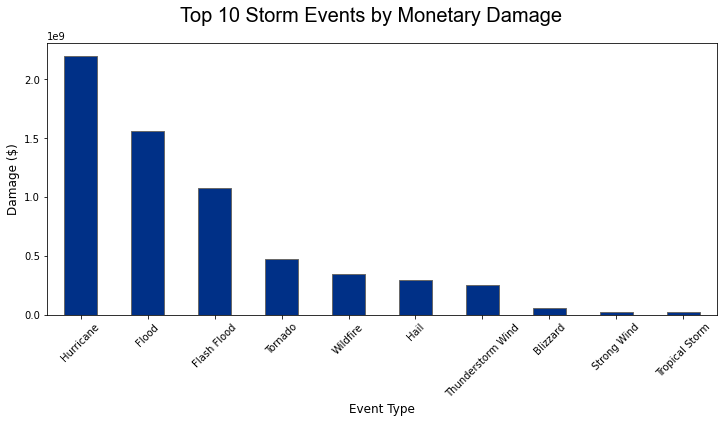

In [60]:
event_damage = details.groupby('event_type')['damage_total'].sum().sort_values(ascending = False).head(10)

event_damage.plot.bar(figsize = (12, 5), color = '#003087', edgecolor = 'dimgrey')
plt.suptitle('Top 10 Storm Events by Monetary Damage', fontsize = 20, fontname = 'Arial')   
    
plt.xticks(rotation = 45)
plt.xlabel("Event Type", fontsize = 12)
plt.ylabel("Damage ($)", fontsize = 12)

Tornado Count on Calendar Heatmap using `calplot`.

In [61]:
import calplot
import matplotlib

tornado_details['end_datetime'] = pd.to_datetime(tornado_details['end_date'])

events = pd.Series(tornado_details['end_datetime'].value_counts())

custom_color = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#d1dde3','#0085CA'])

calplot.calplot(events, cmap = custom_color, colorbar = False, textformat = '{:.0f}', 
                daylabels=[], figsize = (15,4), vmax = 60, suptitle='Tornado Count Calendar Heatmap', 
                yearlabels=False, suptitle_kws = {'x': 0.5, 'y': 0.9})

ModuleNotFoundError: No module named 'calplot'

In [ ]:
events

2022-03-30    99
2022-04-05    83
2022-03-22    56
2022-04-13    56
2022-03-21    49
              ..
2022-07-31     1
2022-07-19     1
2022-07-03     1
2022-07-04     1
2022-06-26     1
Name: end_datetime, Length: 134, dtype: int64

Total Monetary Damage by EF Rating (excluding "Unknown") using `pyplot`. <a name="efdam"></a> [Back](#efdamback)

Text(0, 0.5, 'Damage ($)')

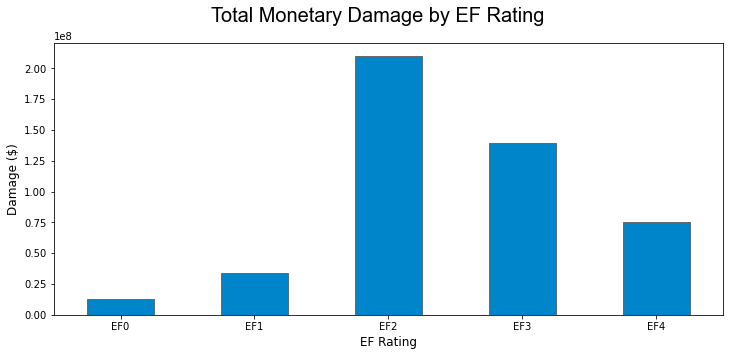

In [ ]:
EF_damage = tornado_details[tornado_details['tor_f_scale'].str.contains('Unknown') == False]
EF_damage = EF_damage.groupby('tor_f_scale')['damage_total'].sum().sort_values(ascending = False).sort_index()

EF_damage.plot.bar(figsize = (12,5), color = '#0085CA', edgecolor = 'dimgrey')
plt.suptitle('Total Monetary Damage by EF Rating', fontsize = 20, fontname = 'Arial')

plt.xticks(rotation = 0)
plt.xlabel('EF Rating', fontsize = 12)
plt.ylabel('Damage ($)', fontsize = 12)

Tornado Storm Events (excluding "Unknown") on map using `pyplot.express`.

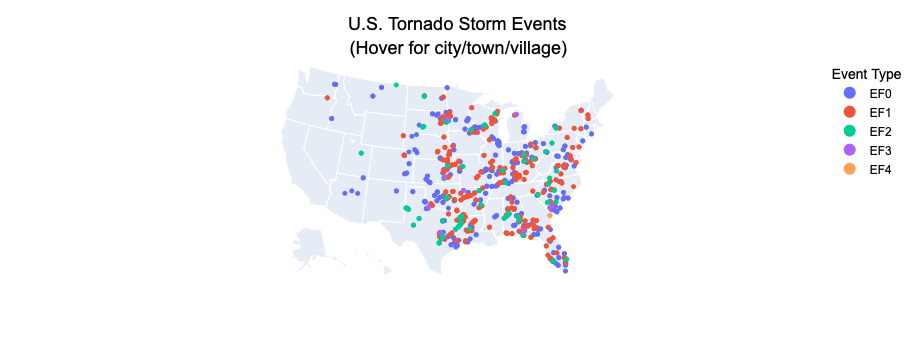

In [ ]:
locations_tor = pd.merge(tornado_details, locations, on = 'event_id', how = 'inner').sort_values(by = 'tor_f_scale')
locations_tor = locations_tor[locations_tor['tor_f_scale'].str.contains('Unknown') == False]

fig = px.scatter_geo(locations_tor, lat='end_lat', lon='end_lon', hover_name= 'location', color = 'tor_f_scale')

fig.update_layout(
        title = 'U.S. Tornado Storm Events<br>(Hover for city/town/village)', 
        geo_scope = 'usa', title_x = 0.5, title_font_family = 'Arial', title_font_color = 'black', title_font_size = 18,
        legend_font_family = 'Arial', legend_font_color = 'black', legend_font_size = 12, legend_itemsizing = 'constant',
        legend_title  = 'Event Type'
    )
fig.update_traces(marker = dict(size = 5))

fig.show()

Top 10 Storm Events by Count of Fatalities using `pyplot`. <a name="eventfat"></a> [Back](#eventfatback)

Text(0, 0.5, 'Count of Fatalities')

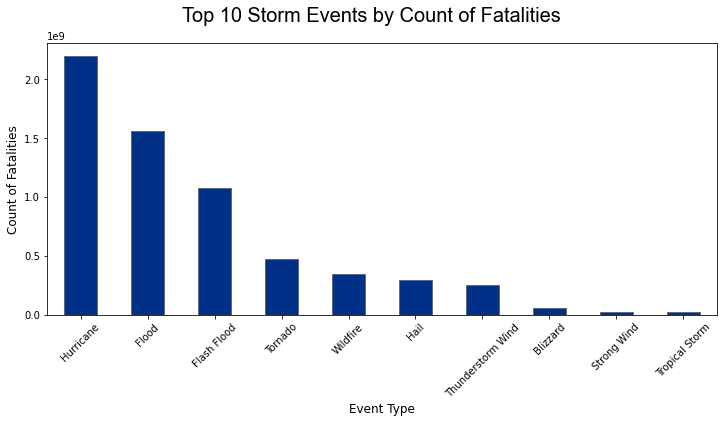

In [ ]:
event_fatality = fatalities.groupby('event_type')['event_id'].count().sort_values(ascending = False).head(10)

event_damage.plot.bar(figsize = (12, 5), color = '#003087', edgecolor = 'dimgrey')
plt.suptitle('Top 10 Storm Events by Count of Fatalities', fontsize = 20, fontname = 'Arial') 

plt.xticks(rotation = 45)
plt.xlabel("Event Type", fontsize = 12)
plt.ylabel("Count of Fatalities", fontsize = 12)

Top 15 Fatality Event Types by Age Category using `pyplot`. <a name="agefat"></a> [Back](#agefatback)

Text(0, 0.5, 'Count of Fatalities')

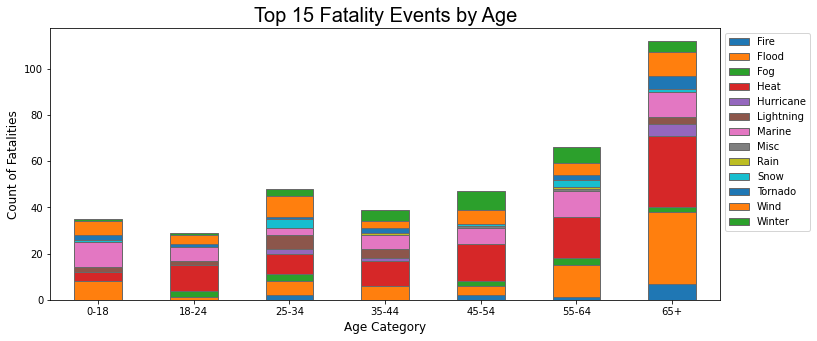

In [ ]:
age_cross_tab = pd.crosstab(index=fatalities['age_category'],
                        columns=fatalities['event_category'])

ax = age_cross_tab.plot.bar(stacked = True, figsize = (12, 5), edgecolor = 'dimgrey')

ax.set_title('Top 15 Fatality Events by Age', fontsize = 20, fontname = 'Arial')
ax.legend(loc = 'best', bbox_to_anchor = (1.0, 1.0))

plt.xticks(rotation = 0)
plt.xlabel('Age Category', fontsize = 12)
plt.ylabel('Count of Fatalities', fontsize = 12)